### 1. Load Libraries

In [13]:
# Import library yang diperlukan
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.decomposition import PCA
import pandas as pd
import joblib

### 2. Load Dataset

In [4]:
# Load dataset Iris dari file CSV
# Gantilah 'iris.csv' dengan path ke file CSV Anda
dataset_path = "iris_dataset.csv"
data = pd.read_csv(dataset_path)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


### 3. Exploratory Data Analysis

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   target_name        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [30]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### 4. Data Preparation

In [37]:
# Pisahkan fitur dan label
X = data.iloc[:, :-2].values  # Semua kolom kecuali yang terakhir
y = data.iloc[:, -2].values   # Kolom terakhir sebagai label
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

### 5. Modelling (K-Nearest Neighbour)

In [38]:
# Bagi dataset menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat model KNN dengan k=3
knn = KNeighborsClassifier(n_neighbors=3)

In [39]:
# Latih model
knn.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = knn.predict(X_test)

In [40]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Accuracy: 1.00

Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### 6. Data Visualization

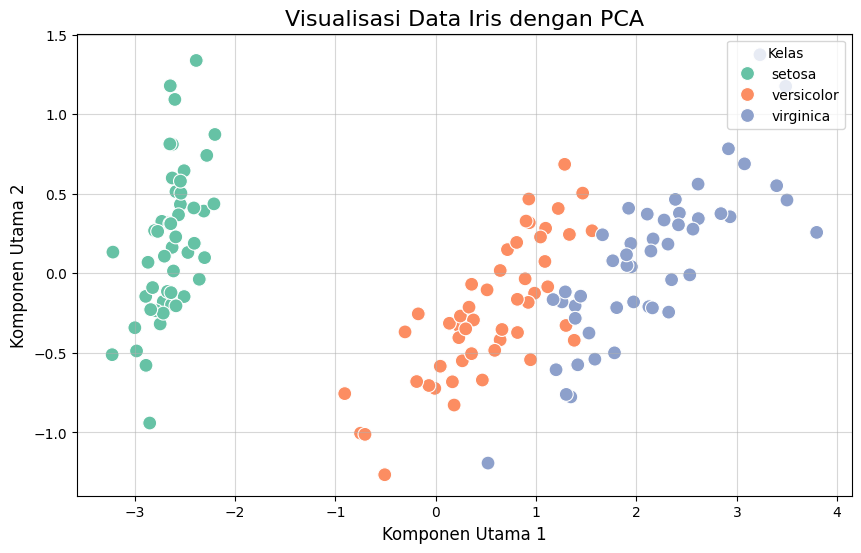

In [41]:
# Visualisasi Data dengan PCA (2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot data
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=X_pca[:, 0], y=X_pca[:, 1], hue=label_encoder.inverse_transform(y), palette='Set2', s=100
)
plt.title("Visualisasi Data Iris dengan PCA", fontsize=16)
plt.xlabel("Komponen Utama 1", fontsize=12)
plt.ylabel("Komponen Utama 2", fontsize=12)
plt.legend(title="Kelas", loc="upper right", fontsize=10)
plt.grid(True, alpha=0.5)
plt.show()


### 7. Save Model

In [42]:
# Save model
joblib.dump(knn, "iris_classification_model.joblib")
print("Model saved!")

Model saved!


In [57]:
# Load model
loaded_model = joblib.load("flask/iris_classification_model.joblib")

# input parameter
SL = float(input("Sepal Length (cm): "))
SW = float(input("Sepal Width (cm): "))
PL = float(input("Petal Length (cm): "))
PW = float(input("Petal Width (cm): "))

sample = [[SL, SW, PL, PW]]
prediction = loaded_model.predict(sample)

print(f"Sepal Length {SL} cm")
print(f"Sepal Width {SW} cm")
print(f"Petal Length {PL} cm")
print(f"Petal Width {PW} cm")

predicted = data.loc[data["target"] == prediction[0], "target_name"].values[0]
print(f"Predicted Result: {predicted}")

Sepal Length 6.7 cm
Sepal Width 2.5 cm
Petal Length 5.8 cm
Petal Width 1.8 cm
Predicted Result: virginica
